In [4]:
from astropy.io import fits
from astropy import units, constants
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import corner
from voigt_fit_lib import *
import os
import pickle
from scipy.stats import linregress

In [2]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/CONTACT/COS_FUV/J0110-1648/'

In [3]:
f = fits.open(rootdir+'J0110-1648_final_abscal.fits')

In [4]:
wave = f[1].data['wave']
flux = f[1].data['flux']
error = f[1].data['error']

In [5]:
z = 0.541288

# CUBS-IV

## HI

In [6]:
lam_rest_HI = 919.35
lam_obs_HI = lam_rest_HI*(1+z)
v_HI = 3e5*(wave-lam_obs_HI)/lam_obs_HI

In [7]:
idx = ((v_HI>-120)&(v_HI<-50))|((v_HI>60)&(v_HI<200))

(0.0, 1000.0)

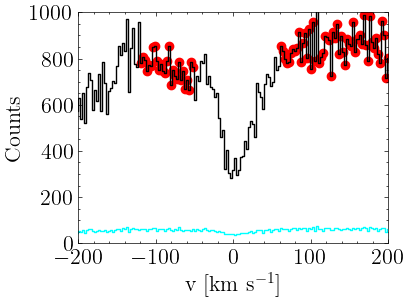

In [8]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_HI, flux, where='mid')
ax.step(v_HI, error, where='mid', color='cyan')

ax.scatter(v_HI[idx], flux[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1000)

In [9]:
lr = linregress(v_HI[idx], y=flux[idx])
m = linregress(v_HI[idx], y=flux[idx])[0]
b = linregress(v_HI[idx], y=flux[idx])[1]
flux_cont = v_HI*m + b

In [10]:
flux_norm_HI = flux/flux_cont
error_norm_HI = error/flux_cont

(0.0, 1.2)

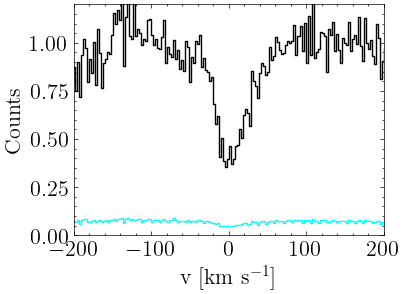

In [11]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_HI, flux_norm_HI, where='mid')
ax.step(v_HI, error_norm_HI, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

## SII

In [12]:
lam_rest_SII = 764.42
lam_obs_SII = lam_rest_SII*(1+z)
v_SII = 3e5*(wave-lam_obs_SII)/lam_obs_SII

In [13]:
idx = ((v_SII>-200)&(v_SII<-50))|((v_SII>60)&(v_SII<200))

(0.0, 1000.0)

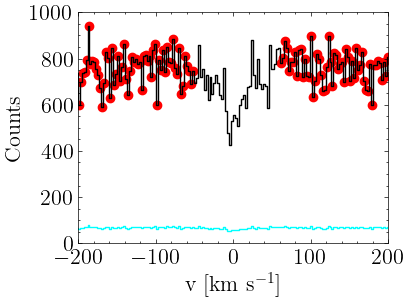

In [14]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux, where='mid')
ax.step(v_SII, error, where='mid', color='cyan')

ax.scatter(v_SII[idx], flux[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1000)

In [15]:
lr = linregress(v_SII[idx], y=flux[idx])
m = linregress(v_SII[idx], y=flux[idx])[0]
b = linregress(v_SII[idx], y=flux[idx])[1]
flux_cont = v_SII*m + b

In [16]:
flux_norm_SII = flux/flux_cont
error_norm_SII = error/flux_cont

(0.0, 1.2)

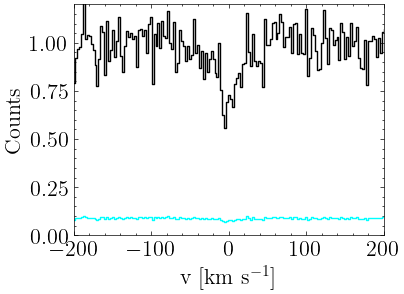

In [17]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux_norm_SII, where='mid')
ax.step(v_SII, error_norm_SII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

(0.0, 1.2)

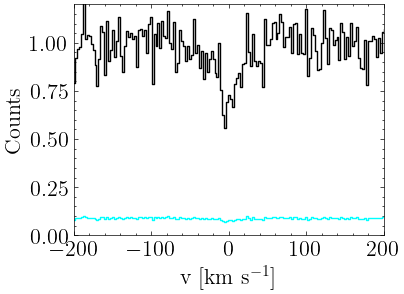

In [18]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux_norm_SII, where='mid')
ax.step(v_SII, error_norm_SII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

## Comparison plot

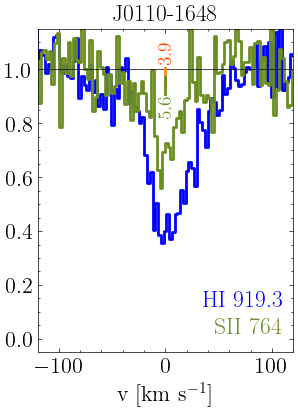

In [19]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(v_HI, flux_norm_HI, where='mid', color='blue', lw=2)
ax.step(v_SII, flux_norm_SII, where='mid', color='olivedrab', lw=2)

ax.text(110,0.12,'HI 919.3', color='blue', horizontalalignment='right', fontsize=17)
ax.text(110,0.02,'SII 764', color='olivedrab', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.83, ymax=0.88, color='darkorange', lw=2)
ax.axvline(0, ymin=0.80, ymax=0.85, color='olivedrab', lw=2)

ax.text(0.8, 1.03, '3.9', rotation=90, fontsize=14, color='orangered', horizontalalignment='center')
ax.text(0.8, 0.83, '5.6', rotation=90, fontsize=14, color='olivedrab', horizontalalignment='center')

ax.set_xlim(-120,120)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('J0110-1648', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/b_NT.png', dpi=300)

# CUBS-V

In [20]:
rootdir = '/Users/thepoetoftwilight/Documents/CUBS/Data/CONTACT/COS_FUV/J0333-4102/'

In [21]:
model_arr = np.loadtxt(rootdir+'HI_model.dat')

In [22]:
f = fits.open(rootdir+'J0333-4102_final_abscal.fits')

In [23]:
wave = f[1].data['wave']
flux = f[1].data['flux']
error = f[1].data['error']

In [24]:
z = 0.93715

# HI

In [25]:
lam_rest_HI = 919.35
lam_obs_HI = lam_rest_HI*(1+z)
v_HI = 3e5*(wave-lam_obs_HI)/lam_obs_HI

In [26]:
lam_obs_HI

1780.9188525

In [27]:
idx = ((v_HI>-200)&(v_HI<-50))|((v_HI>50)&(v_HI<200)) # ((v_HI>-100)&(v_HI<-30))|((v_HI>30)&(v_HI<70)) # 

(-100.0, 2000.0)

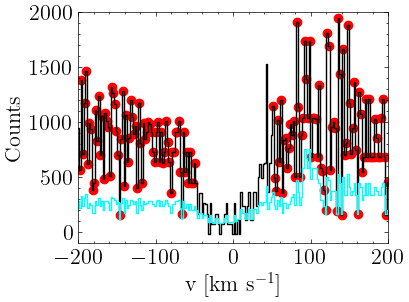

In [28]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_HI, flux, where='mid')
ax.step(v_HI, error, where='mid', color='cyan')

ax.scatter(v_HI[idx], flux[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(-100,2000)

In [29]:
lr = linregress(v_HI[idx], y=flux[idx])
m = linregress(v_HI[idx], y=flux[idx])[0]
b = linregress(v_HI[idx], y=flux[idx])[1]
flux_cont = v_HI*m + b

In [30]:
flux_norm_HI = flux/flux_cont
error_norm_HI = error/flux_cont

(0.0, 1.2)

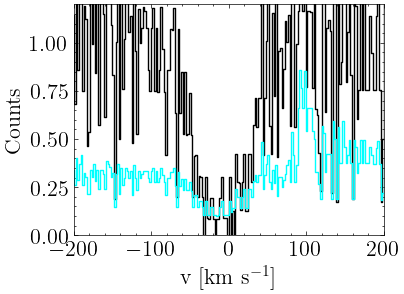

In [31]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_HI, flux_norm_HI, where='mid')
ax.step(v_HI, error_norm_HI, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

# SII

In [32]:
lam_rest_SII = 764.42
lam_obs_SII = lam_rest_SII*(1+z)
v_SII = 3e5*(wave-lam_obs_SII)/lam_obs_SII

In [33]:
idx = ((v_SII>-200)&(v_SII<-30))|((v_SII>60)&(v_SII<150))

(0.0, 1000.0)

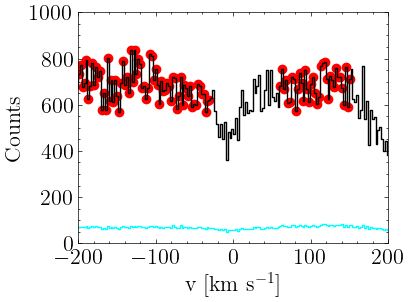

In [34]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux, where='mid')
ax.step(v_SII, error, where='mid', color='cyan')

ax.scatter(v_SII[idx], flux[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1000)

In [35]:
lr = linregress(v_SII[idx], y=flux[idx])
m = linregress(v_SII[idx], y=flux[idx])[0]
b = linregress(v_SII[idx], y=flux[idx])[1]
flux_cont = v_SII*m + b

In [36]:
flux_norm_SII = flux/flux_cont
error_norm_SII = error/flux_cont

(0.0, 1.2)

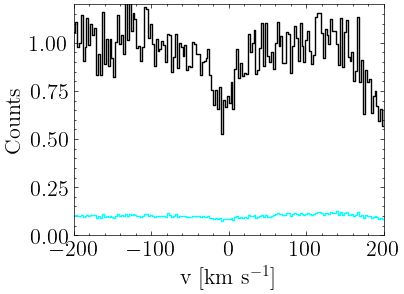

In [37]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux_norm_SII, where='mid')
ax.step(v_SII, error_norm_SII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

(0.0, 1.2)

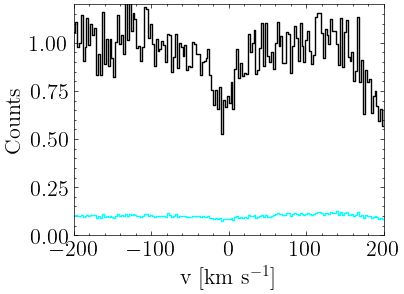

In [38]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_SII, flux_norm_SII, where='mid')
ax.step(v_SII, error_norm_SII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

## Comparison plot

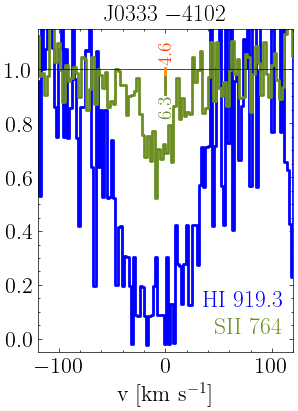

In [40]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(v_HI, flux_norm_HI, where='mid', color='blue', lw=2)
ax.step(v_SII, flux_norm_SII, where='mid', color='olivedrab', lw=2)

ax.text(110,0.12,'HI 919.3', color='blue', horizontalalignment='right', fontsize=17)
ax.text(110,0.02,'SII 764', color='olivedrab', horizontalalignment='right', fontsize=17)


ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.83, ymax=0.88, color='darkorange', lw=2)
ax.axvline(0, ymin=0.80, ymax=0.85, color='olivedrab', lw=2)

ax.text(0.8, 1.03, '4.6', rotation=90, fontsize=14, color='orangered', horizontalalignment='center')
ax.text(0.8, 0.83, '6.3', rotation=90, fontsize=14, color='olivedrab', horizontalalignment='center')

ax.set_xlim(-120,120)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('J0333 −4102', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/logT.png', dpi=300)

## HI sanity check

Text(0.5, 0, 'v [km s${}^{-1}$]')

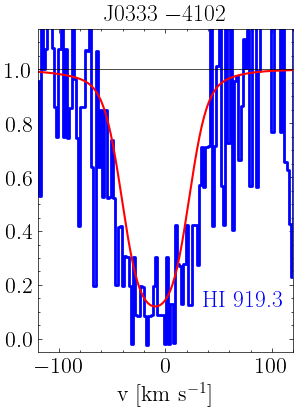

In [42]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(v_HI, flux_norm_HI, where='mid', color='blue', lw=2)
ax.plot(model_arr[:,0]-10, model_arr[:,1], color='red', lw=1.5)

ax.text(110,0.12,'HI 919.3', color='blue', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.set_xlim(-120,120)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('J0333 −4102', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

# DRAFT

# OII

In [15]:
lam_rest_OII = 833.3294
lam_obs_OII = lam_rest_OII*(1+z)
v_OII = 3e5*(wave-lam_obs_OII)/lam_obs_OII

In [16]:
idx = ((v_OII>-100)&(v_OII<-50))|((v_OII>60)&(v_OII<200))

(0.0, 1000.0)

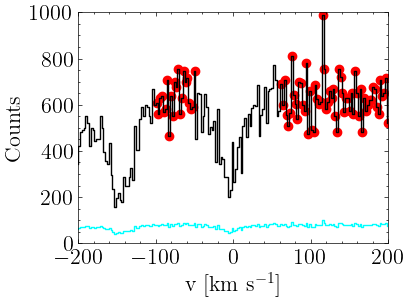

In [17]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_OII, flux, where='mid')
ax.step(v_OII, error, where='mid', color='cyan')

ax.scatter(v_OII[idx], flux[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1000)

In [18]:
lr = linregress(v_OII[idx], y=flux[idx])
m = linregress(v_OII[idx], y=flux[idx])[0]
b = linregress(v_OII[idx], y=flux[idx])[1]
flux_cont = v_OII*m + b

In [19]:
flux_norm_OII = flux/flux_cont
error_norm_OII = error/flux_cont

# MIKE data

In [17]:
rootdir = '/Users/thepoetoftwilight/Documents/Astro/Data/CUBS/MIKE/J0357-4812/'

In [20]:
f_b = fits.open(rootdir+'J0357-4812b_flx.fits')
e_b = fits.open(rootdir+'J0357-4812b_erf.fits')

flux_blue = f_b[0].data
error_blue = e_b[0].data
wave_blue = 10**np.linspace(f_b[0].header['CRVAL1'], 
                           f_b[0].header['CRVAL1']+(len(flux_blue)-1)*f_b[0].header['CDELT1'], 
                           len(flux_blue))

f_r = fits.open(rootdir+'J0357-4812r_flx.fits')
e_r = fits.open(rootdir+'J0357-4812r_erf.fits')

flux_red = f_r[0].data
error_red = e_r[0].data
wave_red = 10**np.linspace(f_r[0].header['CRVAL1'], 
                           f_r[0].header['CRVAL1']+(len(flux_red)-1)*f_r[0].header['CDELT1'], 
                           len(flux_red))

(-1.0, 1.0)

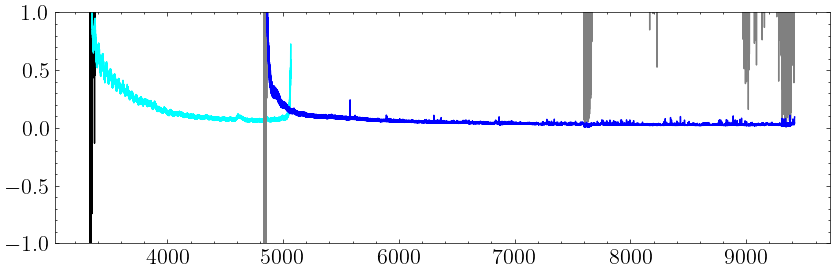

In [21]:
fig, ax = plt.subplots(1, figsize=(10,3))

ax.step(wave_blue, flux_blue, color='black', where='mid')
ax.step(wave_blue, error_blue, color='cyan', where='mid')

ax.step(wave_red, flux_red, color='gray', where='mid')
ax.step(wave_red, error_red, color='blue', where='mid')

ax.set_ylim(-1,1)

# MgII

In [22]:
z = 0.43526 #0.541288

In [23]:
lam_rest_MgII = 2796.3542699 #2803.53
lam_obs_MgII = lam_rest_MgII*(1+z)
v_MgII = 3e5*(wave_blue-lam_obs_MgII)/lam_obs_MgII

In [24]:
v = v_MgII[(v_MgII>-300)&(v_MgII<300)]

In [25]:
v[1:]-v[:-1]

array([4.99847668, 4.99856004, 4.99864341, 4.99872678, 4.99881015,
       4.99889352, 4.99897689, 4.99906027, 4.99914364, 4.99922702,
       4.9993104 , 4.99939378, 4.99947716, 4.99956054, 4.99964392,
       4.99972731, 4.99981069, 4.99989408, 4.99997747, 5.00006086,
       5.00014425, 5.00022765, 5.00031104, 5.00039444, 5.00047784,
       5.00056123, 5.00064464, 5.00072804, 5.00081144, 5.00089484,
       5.00097825, 5.00106166, 5.00114507, 5.00122848, 5.00131189,
       5.0013953 , 5.00147872, 5.00156213, 5.00164555, 5.00172897,
       5.00181239, 5.00189581, 5.00197923, 5.00206265, 5.00214608,
       5.00222951, 5.00231294, 5.00239636, 5.0024798 , 5.00256323,
       5.00264666, 5.0027301 , 5.00281353, 5.00289697, 5.00298041,
       5.00306385, 5.00314729, 5.00323074, 5.00331418, 5.00339763,
       5.00348108, 5.00356452, 5.00364798, 5.00373143, 5.00381488,
       5.00389834, 5.00398179, 5.00406525, 5.00414871, 5.00423217,
       5.00431563, 5.00439909, 5.00448256, 5.00456602, 5.00464

In [35]:
idx = ((v_MgII>-200)&(v_MgII<-50))|((v_MgII>60)&(v_MgII<200))

(-1.0, 1.0)

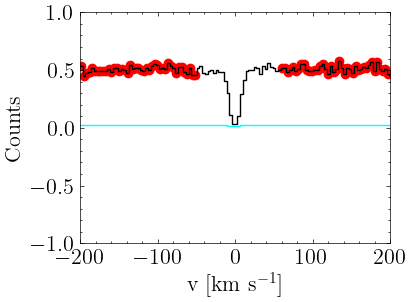

In [36]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_MgII, flux_blue, where='mid')
ax.step(v_MgII, error_blue, where='mid', color='cyan')

ax.scatter(v_MgII[idx], flux_blue[idx], color='red')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(-1,1)

In [37]:
lr = linregress(v_MgII[idx], y=flux_blue[idx])
m = linregress(v_MgII[idx], y=flux_blue[idx])[0]
b = linregress(v_MgII[idx], y=flux_blue[idx])[1]
flux_blue_cont = v_MgII*m + b

In [38]:
flux_blue_norm_MgII = flux_blue/flux_blue_cont
error_blue_norm_MgII = error_blue/flux_blue_cont

(0.0, 1.2)

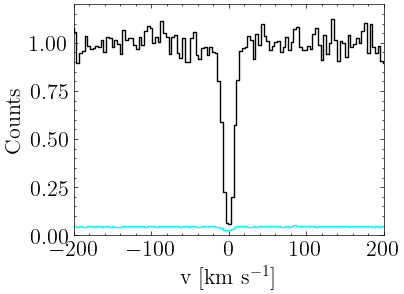

In [39]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_MgII, flux_blue_norm_MgII, where='mid')
ax.step(v_MgII, error_blue_norm_MgII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

(0.0, 1.2)

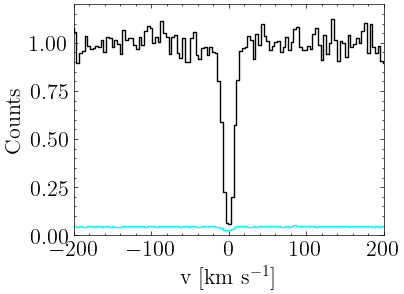

In [40]:
fig, ax = plt.subplots(1, figsize=(4,3))

ax.step(v_MgII, flux_blue_norm_MgII, where='mid')
ax.step(v_MgII, error_blue_norm_MgII, where='mid', color='cyan')

ax.set_xlabel(r'v [km s${}^{-1}$]')
ax.set_ylabel('Counts')
ax.set_xlim(-200,200)
ax.set_ylim(0,1.2)

# Comparison plot

Text(0.5, 0, 'v [km s${}^{-1}$]')

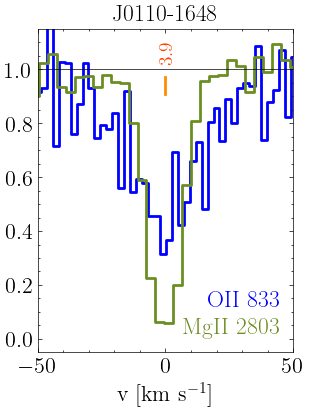

In [41]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(v_OII+5, flux_norm_OII, where='mid', color='blue', lw=2)
ax.step(v_MgII, flux_blue_norm_MgII, where='mid', color='olivedrab', lw=2)

ax.text(45,0.12,'OII 833', color='blue', horizontalalignment='right', fontsize=17)
ax.text(45,0.02,'MgII 2803', color='olivedrab', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.80, ymax=0.85, color='darkorange', lw=2)
ax.text(0.8, 1.03, '3.9', rotation=90, fontsize=14, color='orangered', horizontalalignment='center')
ax.set_xlim(-50,50)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('J0110-1648', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

#plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/logT.png', dpi=300)

# Simulate OII absorption from COS in MIKE

In [42]:
f_lsf_mike = fits.open('/Users/thepoetoftwilight/Documents/CUBS/Data/CONTACT/MIKE/MIKE_wavcal_lsf.fits')

In [43]:
def grab_ion_transition_lsf(lsf_fits, wav0_obs):

    # Convert it to an array
    lsf_data = np.array(lsf_fits[1].data)

    # For each wavelength, isolate LSFs
    lsf_wavs = []

    for i in range(len(lsf_data)):
        lsf_wavs.append(lsf_data[i][0])

    lsf_wavs = np.array(lsf_wavs)

    # Isolate the closest LSF
    lsf_idx = np.argmin(np.abs(wav0_obs-lsf_wavs))
    lsf = lsf_data[lsf_idx][2]

    # Also generate the velocity scale corresponding to the LSF
    delta_v = lsf_data[lsf_idx][1]
    lsf_central_idx = np.argmax(lsf)
    lsf_pix_rel = np.arange(0, len(lsf))-lsf_central_idx
    lsf_pix_v = delta_v*lsf_pix_rel

    # Finally store the LSF velocities and the profile itself
    return lsf, lsf_pix_v

In [44]:
lsf_mike, lsf_pix_v_mike = grab_ion_transition_lsf(f_lsf_mike, lam_rest_OII*(1+z))

In [45]:
v_MgII

array([-68539.159191  , -68536.45694509, -68533.75466763, ...,
        51308.09292041,  51312.19435222,  51316.29583192])

In [46]:
lam_rest_OII

833.3294

In [47]:
_, flux_OII_resamp = comp_model_spec_gen(v_MgII, [[14.76, 6.3, 0]], 
                   lam_rest_OII, 0.0444, 0.016655144, 15.994,
                   True, lsf_mike, lsf_pix_v_mike)

In [48]:
error_OII_resamp = np.sqrt(np.interp(v_MgII, v_OII, error_norm_OII**2))

In [49]:
noise_OII = np.array([np.random.normal(1, e) for e in error_OII_resamp])

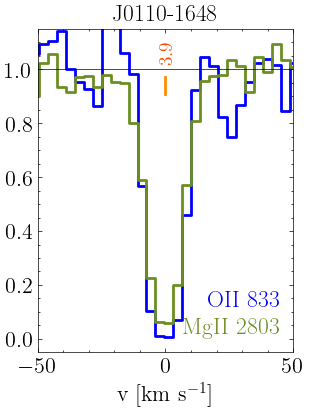

In [50]:
fig, ax = plt.subplots(1, figsize=(3.3,4.2))

ax.step(v_MgII, flux_OII_resamp*noise_OII, where='mid', color='blue', lw=2)
ax.step(v_MgII, flux_blue_norm_MgII, where='mid', color='olivedrab', lw=2)

ax.text(45,0.12,'OII 833', color='blue', horizontalalignment='right', fontsize=17)
ax.text(45,0.02,'MgII 2803', color='olivedrab', horizontalalignment='right', fontsize=17)

ax.axhline(1, lw=.5)

ax.axvline(0, ymin=0.80, ymax=0.85, color='darkorange', lw=2)
ax.text(0.8, 1.03, '3.9', rotation=90, fontsize=14, color='orangered', horizontalalignment='center')
ax.set_xlim(-50,50)
ax.set_ylim(-0.2/4, 1.15)
ax.set_yticks([0.0,0.2,0.4,0.6,0.8,1.0],[0.0,0.2,0.4,0.6,0.8,1.0])

ax.set_title('J0110-1648', fontsize=17)
ax.set_xlabel(r'v [km s${}^{-1}$]')

plt.savefig('/Users/thepoetoftwilight/Documents/CUBS/Data/PG1522+101/Figures/logT.png', dpi=300)